In [1]:
import h5py as H
import numpy as np
import os, sys
import glob
import matplotlib as mpl
mpl.use("Agg")
import pylab as plt
from sklearn.neighbors import KDTree
%matplotlib inline

In [2]:
snapshot = 2
dir = "/str2/ando/gad/osaka/data_box/L205_N9_wmap0/"

f = dir+"groups_%03i/sub_%03i.*.hdf5"%(snapshot, snapshot)
sub_list = glob.glob(f)
f = dir+"snapshot_%03i/snapshot_%03i.*.hdf5"%(snapshot, snapshot)
snap_list = glob.glob(f)

In [35]:
Fwrite = True
GM_C200 = None
for sub in sub_list:
    print ("reading...", sub)
    d = H.File(sub, "r")
    #----#
    if ( Fwrite ):
        for k in d.keys():
            print (k)
            for item in d[k]:
                print ("  ", item)
    Fwrite = False
    #----#
    if ( GM_C200 is None ):
        GM_C200 = np.array(d["Group/Group_M_Crit200"])
        GR_C200 = np.array(d["Group/Group_R_Crit200"])
        GPos    = np.array(d["Group/GroupPos"])
        GLen    = np.array(d["Group/GroupLen"])
    else:
        GM_C200 = np.append(GM_C200, np.array(d["Group/Group_M_Crit200"]))
        GR_C200 = np.append(GR_C200, np.array(d["Group/Group_R_Crit200"]))
        GPos    = np.append(GPos   , np.array(d["Group/GroupPos"]), axis=0)
        GLen    = np.append(GLen   , np.array(d["Group/GroupLen"]))
    

mass_comp_limit = 10.**1.25
print ("mass_comp_limit=", mass_comp_limit)

#mask = np.isfinite(GM_C200)&(GM_C200>mass_comp_limit)
mask = np.isfinite(GM_C200)&(GM_C200>0.)

GM_C200 = GM_C200[mask]
GR_C200 = GR_C200[mask]
GLen    = GLen   [mask]
GPos    = GPos   [mask,:]

print (GM_C200.shape)
print (GM_C200.shape)
print (GPos.shape)
print (GLen.shape)
Ngrp = GPos.shape[0]

if ( False ):
    plt.hist(np.log10(GM_C200), bins=100)
    plt.yscale("log")
    plt.show()

reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.0.hdf5
Group
   GroupContaminationCoun
   GroupContaminationMass
   GroupFirstSub
   GroupLen
   GroupMass
   GroupNsubs
   GroupOffset
   GroupPos
   Group_M_Crit200
   Group_M_Mean200
   Group_M_TopHat200
   Group_R_Crit200
   Group_R_Mean200
   Group_R_TopHat200
   Group_VelDisp_Crit200
   Group_VelDisp_Mean200
   Group_VelDisp_TopHat200
Header
IDs
   PID 
Subhalo
   SubhaloCM
   SubhaloGrNr
   SubhaloHalfmassRad
   SubhaloIDMostbound
   SubhaloLen
   SubhaloMass
   SubhaloOffset
   SubhaloParent
   SubhaloPos
   SubhaloSpin
   SubhaloVel
   SubhaloVelDisp
   SubhaloVmax
   SubhaloVmaxRad
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.1.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.2.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.3.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.4.hdf5
rea

In [11]:
# read snapshot particles
#
ic = 0
GasPos = None
Fwrite = True
for snap in snap_list:
    d = H.File(snap, "r")
    print ("reading...", snap)
    #ic += 1
    #if ( ic > 2 ):
    #    continue

    #----#
    if ( Fwrite ):
        for k in d.keys():
            print (k)
            for item in d[k]:
                print ("  ", item)
    Fwrite = False
    #----#
    if ( GasPos is None ):
        GasPos  = np.array(d["PartType0/Coordinates"])
        HIfrac  = np.array(d["PartType0/HI"]         )
        GasMass = np.array(d["PartType0/Masses"]     )
    else:
        GasPos  = np.append(GasPos,  np.array(d["PartType0/Coordinates"]), axis=0)
        HIfrac  = np.append(HIfrac,  np.array(d["PartType0/HI"]         )        )
        GasMass = np.append(GasMass, np.array(d["PartType0/Masses"]     )        )

HIMass = HIfrac*GasMass

#
GasPos0 = GasPos[::1,:]
HIMass0 = HIMass[::1]
#

print (GasPos0.shape)
print (GPos.shape)

reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/snapshot_002/snapshot_002.0.hdf5
Header
PartType0
   ArtificialViscosity
   CELibCalcium
   CELibCarbon
   CELibHelium
   CELibHydrogen
   CELibIron
   CELibMagnesium
   CELibNeon
   CELibNickel
   CELibNitrogen
   CELibOxygen
   CELibSilicon
   CELibSulfur
   Coordinates
   DI
   DII
   Density
   ElectronAbundance
   EnergyWeightedDensity
   H2I
   H2II
   HDI
   HI
   HII
   HM
   HeI
   HeII
   HeIII
   InternalEnergy
   Masses
   Metallicity
   MetallicitySmoothed
   ParticleIDs
   Pressure
   SNIICoolingFlag
   SNIIEndtime
   SNIIEnergyStorage
   SNIINocoolingTime
   SNIaCoolingFlag
   SNIaEndtime
   SNIaEnergyStorage
   SNIaNocoolingTime
   SmoothingLength
   StarFormationRate
   Temperature
   Velocities
   WindVelocity
   nStarSpwan
PartType1
   Coordinates
   ParticleIDs
   Velocities
PartType4
   AGBEndTime
   AGBExplosionTime
   AGBFeedbackFlag
   AGBStartTime
   CELibCalcium
   CELibCarbon
   CELibHelium
   CELibHydrog

In [16]:
tree_T = KDTree(GasPos0, leaf_size=100, metric="euclidean")
ind, dist = tree_T.query_radius(GPos, r=GR_C200, return_distance=True, count_only=False)

In [17]:
HIMass_indiv = np.zeros(Ngrp)
for i in range(ind.shape[0]):
    HIMass_indiv[i] = np.sum(HIMass[ind[i]])

<Figure size 432x288 with 0 Axes>

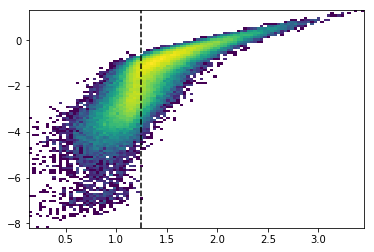

<Figure size 432x288 with 0 Axes>

In [26]:
fig = plt.figure()
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv), bins=[100,100], norm=mpl.colors.LogNorm())
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.figure()

In [21]:
rmin = 1e30
rmax = -1e30
for i in range(ind.shape[0]):
    m = dist[i]>0.
    if ( m[m].shape[0]>0 ):
        rmin = min(dist[i][m].min(), rmin)
    rmax = max(dist[i].max(), rmax)
print (rmin, rmax)

8.148196931188136e-06 0.7513192085968001


In [44]:
ind_q, dist_q = [], []
for i in range(GLen.shape[0]):
    dist_, ind_ = tree_T.query(GPos[i,:].reshape(1,3), k=GLen[i], return_distance=True)
    ind_q.append(ind_)
    dist_q.append(dist_)

11840 [179.87569 120.72096 109.16829]
10419 [183.0782    52.096466  94.90209 ]
9578 [102.203224 178.21582  178.42506 ]
9452 [109.76595  155.06296   26.483768]
8256 [160.56201   33.386726 136.53719 ]
8214 [ 92.37479  108.10824  104.599174]
8207 [21.47339    72.29772     0.13243319]
7835 [58.285515 48.684563 74.158714]
7446 [ 37.9695   141.68741   44.123646]
7390 [31.780912 61.196045 93.460365]
7184 [150.94658      0.59195787   9.557967  ]
6407 [109.033714 138.20648  159.1425  ]
6359 [127.51912   10.402802  71.68555 ]
6186 [110.78401 108.97753 110.74125]
6178 [ 80.00789 146.91882   7.02764]
6081 [105.84007 184.62822 176.59062]
6065 [ 88.23418      0.63289475 161.95213   ]
5896 [111.77391 135.93666 162.43477]
5496 [141.2957   173.73717   14.011863]
5400 [178.9648   50.48617  97.93588]
5186 [ 38.389153 145.67137  125.40086 ]
5148 [ 92.64568  88.95953 142.46545]
5138 [ 69.09679   55.899406 145.49007 ]
5112 [115.143906 133.5852   167.4003  ]
5088 [118.35205 165.1595  178.3054 ]
5001 [ 53.243

In [46]:
HIMass_indiv_exact = np.zeros(Ngrp)
for i in range(Ngrp):
    HIMass_indiv_exact[i] = np.sum(HIMass[ind_q[i]])

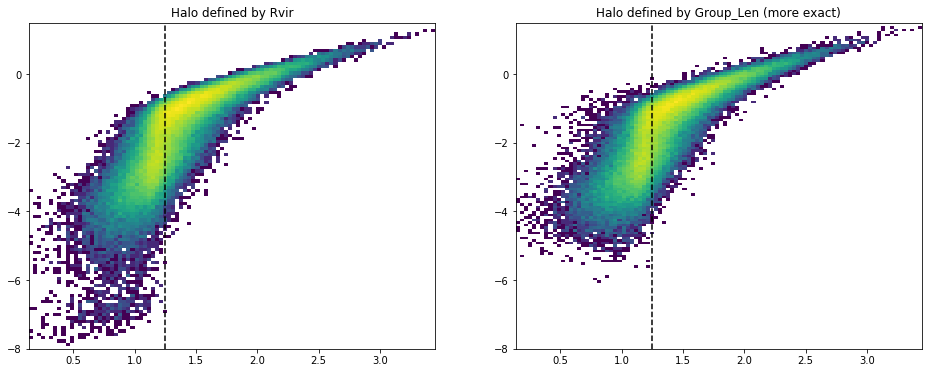

In [118]:
%matplotlib inline
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv), bins=[100,100], norm=mpl.colors.LogNorm())
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.ylim(-8,1.5)
plt.title("Halo defined by Rvir")
plt.subplot(122)
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv_exact), bins=[100,100], norm=mpl.colors.LogNorm())
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.title("Halo defined by Group_Len (more exact)")
plt.ylim(-8,1.5)
plt.show()

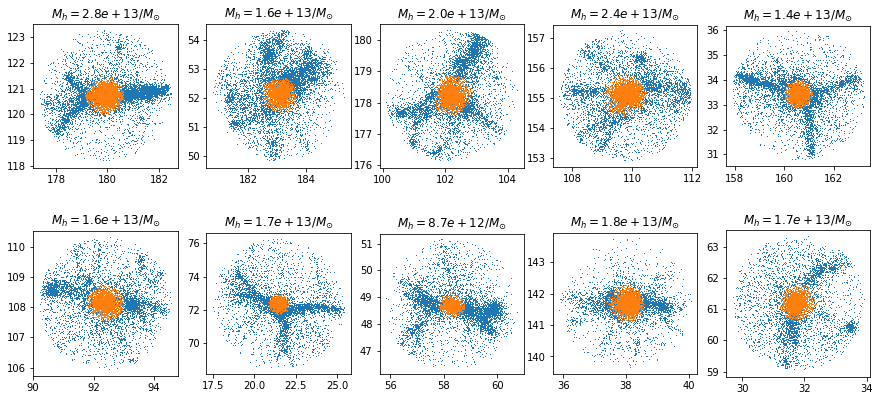

In [133]:
plt.figure(figsize=(15,7))
offset = 0
for i in range(offset,offset+10):
    plt.subplot(2,5,i+1-offset,aspect=1)
    plt.plot(GasPos[ind_q[i][0],0],GasPos[ind_q[i][0],1], "C0,")
    plt.plot(GasPos[ind  [i]   ,0],GasPos[ind  [i]   ,1], "C1,")
    plt.title(r"$M_h=%.1e /M_{\odot}$"%(GM_C200[i]*1e10))
plt.show()

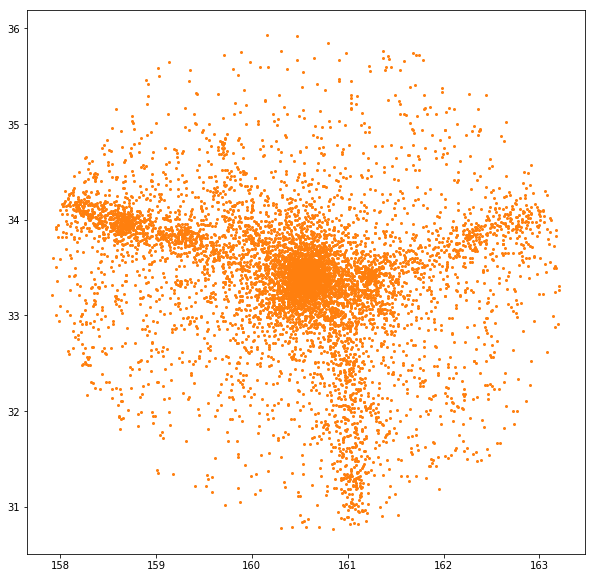

In [114]:
%matplotlib inline
plt.figure(figsize=(10,10))
i=4
m = ind_q[i][0]
#m = ind[i]
scale = HIMass[m]
scale = np.log10((scale-scale.min())/(scale.max()-scale.min())+0.001)+3
plt.plot(GasPos[m,0],GasPos[m,1], "C1o", ms=2)
plt.show()

In [101]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


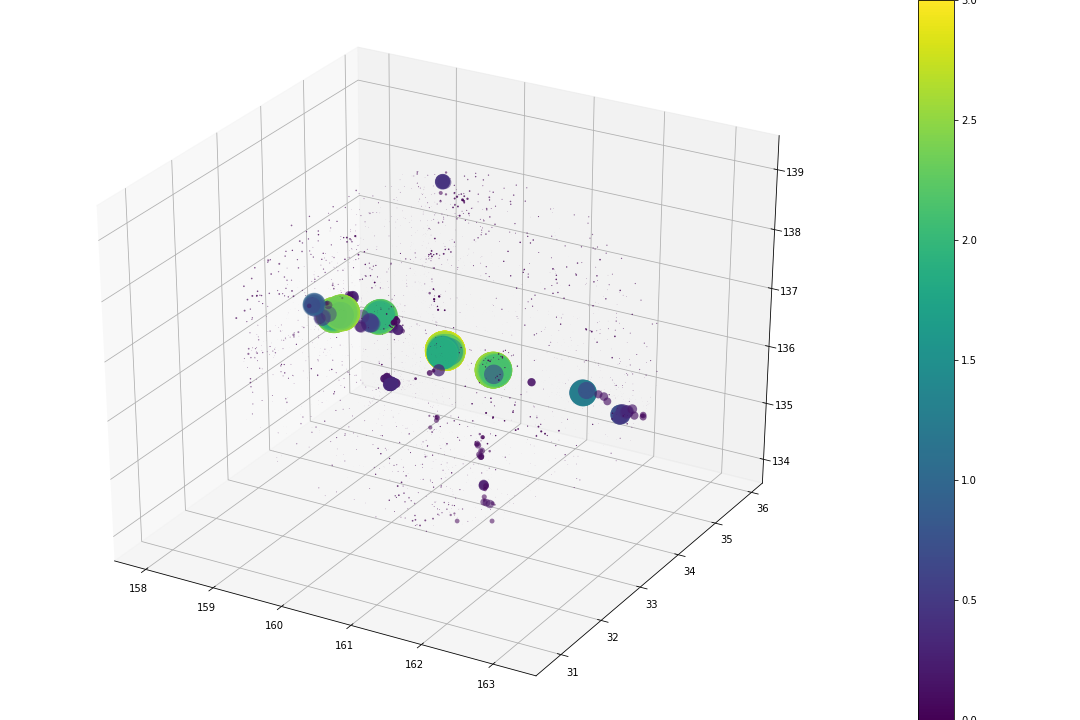

In [115]:
%matplotlib notebook
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
sc = ax.scatter3D(GasPos[m,0],GasPos[m,1], GasPos[m,2], c=scale, edgecolor="none", s=scale*500)
fig.colorbar(sc)